# 3.4 季節成分が複数ある場合の予測モデル

## 3.4.1　MSTLで複数の季節成分を分解
- Multiple Seasonal-Trend decomposition based on LOESS

### 準備

In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

import rpy2
# Jupyter Notebook上でrpy2拡張機能を有効化し、Python/Rの連携機能を提供する
get_ipython().run_line_magic('load_ext', 'rpy2.ipython')

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('ggplot') #グラフのスタイル
plt.rcParams['figure.figsize'] = [12, 9] # グラフサイズ設定
plt.rcParams['font.size'] = 14 #フォントサイズ


In [2]:
# Rのデータセットを読み込む(30分ごとの電力需要データ)
dataset = sm.datasets.get_rdataset(
    'taylor', 'forecast'
)
print(dataset.data)


          x
0     22262
1     21756
2     22247
3     22759
4     22549
...     ...
4027  27946
4028  27133
4029  25996
4030  24610
4031  23132

[4032 rows x 1 columns]


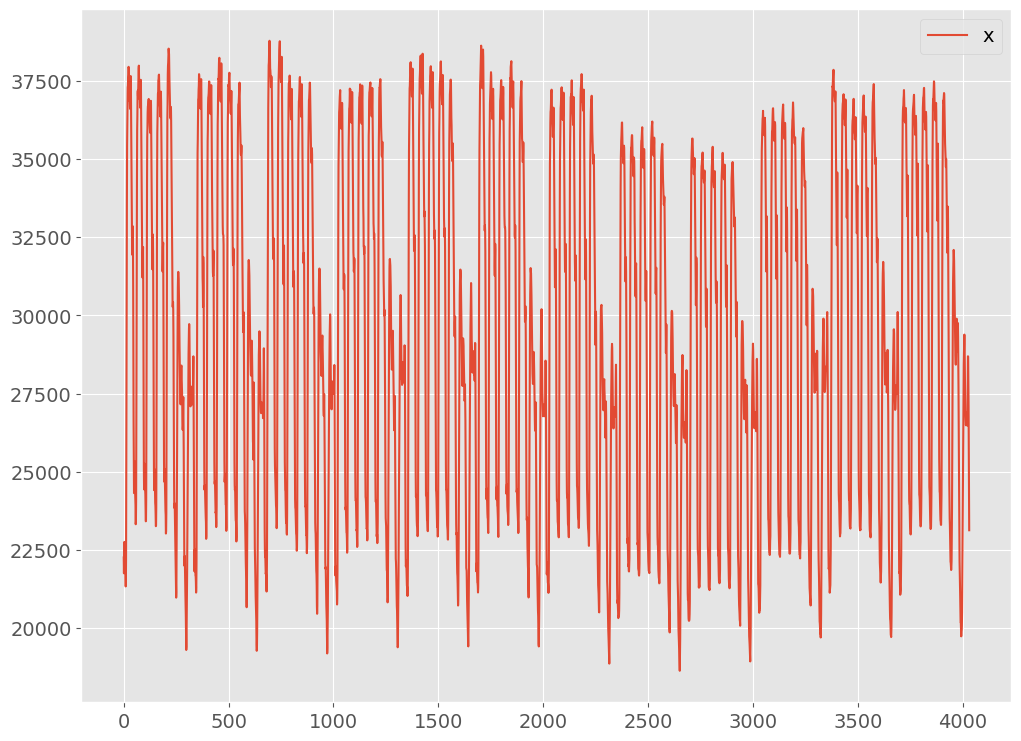

In [4]:
dataset.data.plot()
plt.show()


### RのMSTL分解

In [5]:
# Python環境からR環境へオブジェクトを渡す

y = dataset.data.x # R環境に渡すデータをyに格納
%R -i y # Python環境からR環境へyを渡す



 --- このセッションで使うために、CRAN のミラーサイトを選んでください --- 


Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Austria [https]
 6: Belgium (Brussels) [https]
 7: Brazil (PR) [https]
 8: Brazil (RJ) [https]
 9: Brazil (SP 1) [https]
10: Brazil (SP 2) [https]
11: Bulgaria [https]
12: Canada (MB) [https]
13: Canada (ON) [https]
14: Chile (Santiago) [https]
15: China (Beijing 2) [https]
16: China (Beijing 3) [https]
17: China (Hefei) [https]
18: China (Hong Kong) [https]
19: China (Guangzhou) [https]
20: China (Jinan) [https]
21: China (Lanzhou) [https]
22: China (Nanjing) [https]
23: China (Shanghai 2) [https]
24: China (Shenzhen) [https]
25: Colombia (Cali) [https]
26: Costa Rica [https]
27: Cyprus [https]
28: Czech Republic [https]
29: Denmark [https]
30: Ecuador (Cuenca) [https]
31: France (Lyon 1) [https]
32: France (Lyon 2) [https]
33: France (Marseille) [https]
34: France (Paris 1) [https]
35: Germany (Erlangen) [https]
36: Germany (Göttingen)

 依存対象 (dependency) ‘utf8’, ‘farver’, ‘labeling’, ‘munsell’, ‘R6’, ‘RColorBrewer’, ‘viridisLite’, ‘fansi’, ‘pillar’, ‘pkgconfig’, ‘xts’, ‘TTR’, ‘curl’, ‘cli’, ‘glue’, ‘gtable’, ‘isoband’, ‘lifecycle’, ‘rlang’, ‘scales’, ‘tibble’, ‘vctrs’, ‘withr’, ‘quadprog’, ‘quantmod’, ‘jsonlite’, ‘colorspace’, ‘fracdiff’, ‘generics’, ‘ggplot2’, ‘lmtest’, ‘magrittr’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’ もインストールします 

 URL 'https://cran.ism.ac.jp/bin/macosx/big-sur-arm64/contrib/4.3/utf8_1.2.4.tgz' を試しています 
Content type 'application/x-gzip' length 206924 bytes (202 KB)
downloaded 202 KB

 URL 'https://cran.ism.ac.jp/bin/macosx/big-sur-arm64/contrib/4.3/farver_2.1.1.tgz' を試しています 
Content type 'application/x-gzip' length 1939087 bytes (1.8 MB)
downloaded 1.8 MB

 URL 'https://cran.ism.ac.jp/bin/macosx/big-sur-arm64/contrib/4.3/labeling_0.4.3.tgz' を試しています 
Content type 'application/x-gzip' length 60952 bytes (59 KB)
downloaded 59 KB

 URL 'https://cran.ism.ac.jp/bin/macosx/big-sur-

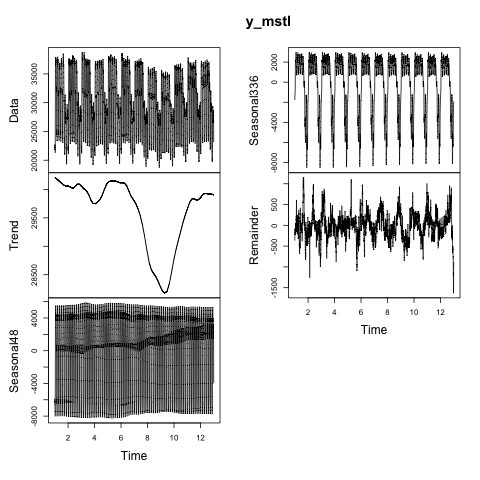

In [7]:
%%R # これでセルがR環境になる

# Rのforecastパッケージを読み込む
install.packages("forecast")
library(forecast)

# 時系列オブジェクトに変換
y = msts(y, seasonal.periods = c(48, 336))

# MSTLで分解
y_mstl = mstl(y)

# 分解結果をプロット
plot(y_mstl)


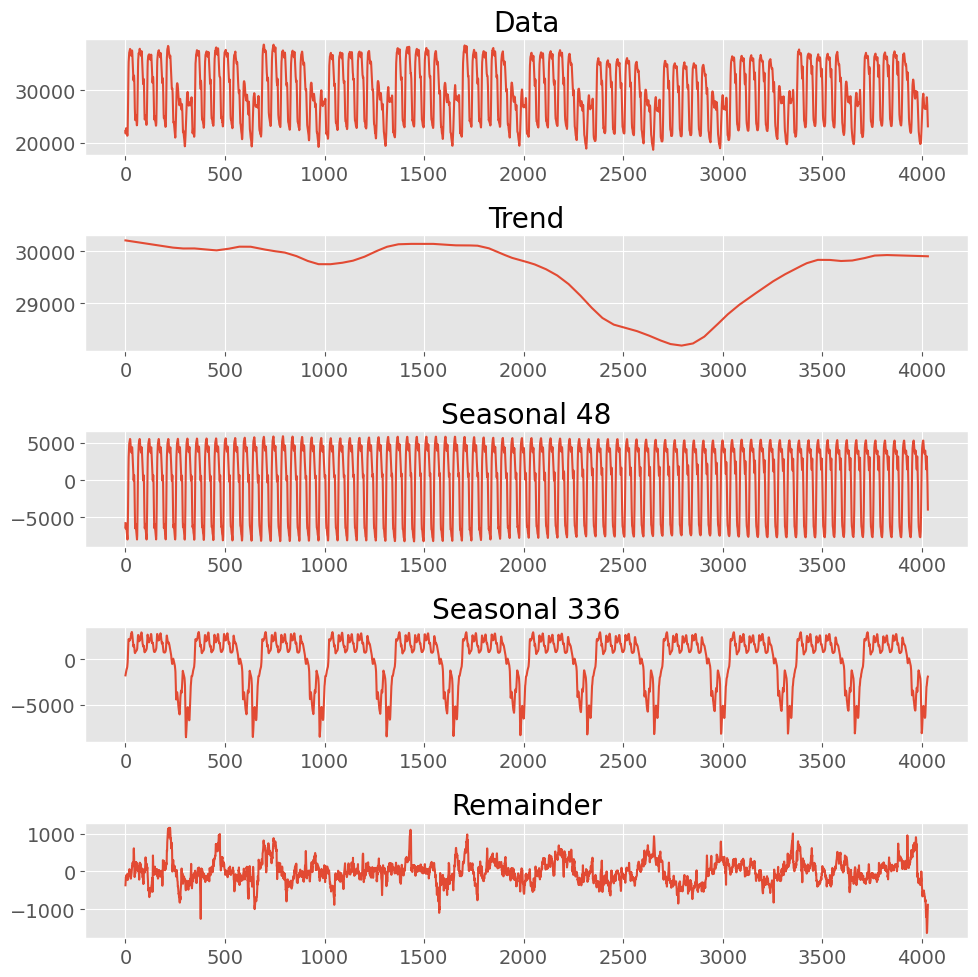

In [12]:
# 上記の結果をPython環境でも表示してみる

# R環境のy_mstlをPython環境に渡す
%R -o y_mstl

# Python環境でプロット
fig, ax = plt.subplots(5, 1, figsize=(10, 10))

ax[0].plot(y_mstl[:, 0])
ax[1].plot(y_mstl[:, 1])
ax[2].plot(y_mstl[:, 2])
ax[3].plot(y_mstl[:, 3])
ax[4].plot(y_mstl[:, 4])

ax[0].set_title('Data')
ax[1].set_title('Trend')
ax[2].set_title('Seasonal 48')
ax[3].set_title('Seasonal 336')
ax[4].set_title('Remainder')

fig.tight_layout()
plt.show()


- Data : 元の時系列データ
- Trend : トレンド成分
- Seasonal48 : 1日周期(48周期)の季節成分
- Seasonal336 : 1週周期(336周期)の季節成分
- Remainder : 残差成分